In [1]:
#import
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#feature selection
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#cross validation
from sklearn.model_selection import train_test_split

#covariance
from scipy import linalg
from sklearn.covariance import LedoitWolf, OAS, ShrunkCovariance, log_likelihood, empirical_covariance
from sklearn.model_selection import GridSearchCV

#Parameters
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#models
modelsvr = SVR()
modelrf = RandomForestRegressor()
modellr = LinearRegression()

In [3]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
#features
features = rawData.iloc[:,:6]
print('Summary of feature sample')
features.head()

Summary of feature sample


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,1,20000,2,2,1,24
1,2,120000,2,2,2,26
2,3,90000,2,2,2,34
3,4,50000,2,2,1,37
4,5,50000,1,2,1,57


In [6]:
#dependent variable
depVar = rawData['default payment next month']
print(depVar)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64


In [7]:
x_train, x_test, y_train, y_test = train_test_split(features, depVar, test_size = .25, random_state =100)

In [8]:
#training set (featuer space: x training)
x_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
12282,12283,250000,2,2,1,36
23792,23793,50000,2,2,1,58
15732,15733,50000,2,2,1,30
23875,23876,80000,1,1,2,25
6873,6874,20000,1,3,1,56


In [9]:
#dependent variable training set (y training)
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:', str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 22500


12282    0
23792    0
15732    0
23875    0
6873     0
Name: default payment next month, dtype: int64

In [10]:
#testing set (x testing)
x_test_count = len(x_test.index)
print('The number of observations in the feature testing set is:', str(x_test_count))
print(x_test.head())

The number of observations in the feature testing set is: 7500
          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE
6102    6103      50000    1          2         1   38
2539    2540      20000    1          1         1   49
21576  21577      20000    2          2         2   21
19574  19575     190000    2          3         1   43
12804  12805     500000    2          1         2   34


In [11]:
#ground truth (y_test)
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:', str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 7500


6102     0
2539     0
21576    0
19574    0
12804    0
Name: default payment next month, dtype: int64

In [12]:
x_feature = features[:150]
y_feature = depVar[:150]
x_train.shape, x_test.shape, y_train.shape, y_test.shape, x_feature.shape, y_feature.shape

((22500, 6), (7500, 6), (22500,), (7500,), (150, 6), (150,))

Optimal number of features : 1


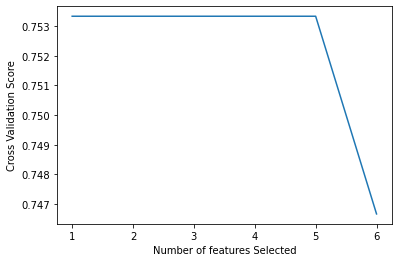

In [13]:
svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(x_feature, y_feature)
print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features Selected")
plt.ylabel("Cross Validation Score")
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

In [14]:
print(rfecv.support_)
print(rfecv.ranking_)
x_train_rfe = x_train.iloc[:, rfecv.get_support()]
x_test_rfe = x_test.iloc[:, rfecv.get_support()]

[False False False  True False False]
[4 5 6 1 2 3]


In [15]:
#RF
rfm = modelrf.fit(x_train,y_train)
rfp = modelrf.predict(x_test)
rmse = sqrt(mean_squared_error(y_test, rfp))
acc = accuracy_score(y_test, rfp.round())
print('RMSE: %.3f' % rmse)
print('Accuracy: %.3f' %acc)

RMSE: 0.438
Accuracy: 0.739


In [16]:
#RF with Selected Feature
rfmrfe = modelrf.fit(x_train_rfe, y_train)
rfprfe = modelrf.predict(x_test_rfe)
rmse = sqrt(mean_squared_error(y_test, rfprfe))
acc = accuracy_score(y_test, rfprfe.round())
print('RMSE: %.3f' % rmse)
print('Accuracy: %.3f' %acc)

RMSE: 0.420
Accuracy: 0.770


In [17]:
#RF Parameter Tuning RandomizedSearchCV
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}
rf_random = RandomizedSearchCV(estimator = modelrf, param_distributions = random_grid)

In [18]:
#RF with parameters tuned
rfm = rf_random.fit(x_train,y_train)
rfp = rf_random.predict(x_test)
rmse = sqrt(mean_squared_error(y_test, rfp))
acc = accuracy_score(y_test, rfp.round())
print('RMSE: %.3f' % rmse)
print('Accuracy: %.3f' %acc)

RMSE: 0.420
Accuracy: 0.766


In [19]:
#RF with parameters tuned and selected feature
rfm = rf_random.fit(x_train_rfe, y_train)
rfp = rf_random.predict(x_test_rfe)
rmse = sqrt(mean_squared_error(y_test, rfp))
acc = accuracy_score(y_test, rfp.round())
print('RMSE: %.3f' % rmse)
print('Accuracy: %.3f' %acc)

RMSE: 0.420
Accuracy: 0.770


In [20]:
#SVR
svrm = modelsvr.fit(x_train, y_train)
svrp = modelsvr.predict(x_test)
rmse = sqrt(mean_squared_error(y_test, svrp))
acc = accuracy_score(y_test, svrp.round())
print('RMSE: %.3f' % rmse)
print('Accuracy: %.3f' %acc)

RMSE: 0.440
Accuracy: 0.770


In [21]:
#SVR with selected feature
svrm = modelsvr.fit(x_train_rfe, y_train)
svrp = modelsvr.predict(x_test_rfe)
rmse = sqrt(mean_squared_error(y_test, svrp))
acc = accuracy_score(y_test, svrp.round())
print('RMSE: %.3f' % rmse)
print('Accuracy: %.3f' %acc)

RMSE: 0.440
Accuracy: 0.770


In [26]:
#SVR Parameter Tuning GridSearchCV
parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}]
svr_grid = GridSearchCV(modelsvr, parameters, cv=5)

In [27]:
#SVR
svrm = svr_grid.fit(x_train, y_train)
svrp = svr_grid.predict(x_test)
rmse = sqrt(mean_squared_error(y_test, svrp))
acc = accuracy_score(y_test, svrp.round())
print('RMSE: %.3f' % rmse)
print('Accuracy: %.3f' %acc)

RMSE: 0.467
Accuracy: 0.712


In [35]:
#SVR
svrm = svr_grid.fit(x_train_rfe, y_train)
svrp = svr_grid.predict(x_test_rfe)
rmse = sqrt(mean_squared_error(y_test, svrp))
acc = accuracy_score(y_test, svrp.round())
print('RMSE: %.3f' % rmse)
print('Accuracy: %.3f' %acc)

RMSE: 0.440
Accuracy: 0.770


In [31]:
#lr
lrm = modellr.fit(x_train, y_train)
lrp = modellr.predict(x_test)
rmse = sqrt(mean_squared_error(y_test, lrp))
acc = accuracy_score(y_test, lrp.round())
print('RMSE: %.3f' % rmse)
print('Accuracy: %.3f' %acc)

RMSE: 0.415
Accuracy: 0.770


In [28]:
#lr with selected features
lrm = modellr.fit(x_train_rfe, y_train)
lrp = modellr.predict(x_test_rfe)
rmse = sqrt(mean_squared_error(y_test, lrp))
acc = accuracy_score(y_test, lrp.round())
print('RMSE: %.3f' % rmse)
print('Accuracy: %.3f' %acc)

RMSE: 0.421
Accuracy: 0.770


In [32]:
parameters = {'fit_intercept': ['True', 'False'], 'n_jobs': [1, 10, 100]}
rf_grid = GridSearchCV(modellr, parameters, cv=5)

In [33]:
#lr with tuned parameters
lrm = rf_grid.fit(x_train, y_train)
lrp = rf_grid.predict(x_test)
rmse = sqrt(mean_squared_error(y_test, lrp))
acc = accuracy_score(y_test, lrp.round())
print('RMSE: %.3f' % rmse)
print('Accuracy: %.3f' %acc)

RMSE: 0.415
Accuracy: 0.770


In [34]:
#lr with tuned parameters and selected features
lrm = rf_grid.fit(x_train_rfe, y_train)
lrp = rf_grid.predict(x_test_rfe)
rmse = sqrt(mean_squared_error(y_test, lrp))
acc = accuracy_score(y_test, lrp.round())
print('RMSE: %.3f' % rmse)
print('Accuracy: %.3f' %acc)

RMSE: 0.421
Accuracy: 0.770
